# Key Indicators of Heart Disease
## 2020 annual CDC survey data of 400k adults related to their health status

Available in: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

## Data analysis by Raphael Caetano da Silva
### Visualization of data and graphics from the dataframe available on the Kaggle platform

*Avaliação final do Curso DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY) - Programa de Formação Let's Code by ADA juntamente com a SUZANO, no programa Diversidade Tech*

### Introduction

*This study aims to trace the correlation between people who have already reported having coronary heart disease (CHD) or myocardial infarction (MI) with other comorbidities and assess the possibility that these diseases may aggravate a future heart attack.*

*According to the CDC, heart disease is a leading cause of death for people of most races in the US.
Much is known about heart disease, but little is known about patients who already have/have had heart problems and their habits and how this may impact them in the future.*

*This work only aims to correlate the collected data and evaluate the profile of patients who have already had heart problems and whether this population has other comorbidities and to what degree this is related to some factors such as their BMI and health habits (physical care and mental health).*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns 

In [2]:
base = pd.read_csv('heart_2020_cleaned.csv')

**Column description**

*HeartDisease* - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

*BMI* - Body Mass Index (BMI)

*Smoking* - Have you smoked at least 100 cigarettes in your entire life?

*AlcoholDrinking* - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

*Stroke* - (Ever told) (you had) a stroke?

*PhysicalHealth* - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

*MentalHealth* - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)

*DiffWalking* - Do you have serious difficulty walking or climbing stairs?

*Sex*

*AgeCategory*

*GenHealth*

*SleepTime* 

*Asthma*

*KidneyDisease*

*SkinCancer*

## Handling the Dataframe

In [3]:
base.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
base

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Reported Cases of Heart Disease.


Our study only aims to visualize the population that already had/has heart problems and to verify which other comorbidities or habits may influence the maintenance of the patients' health.
So we will only choose the population in the dataframe that has had or has reported heart problems.

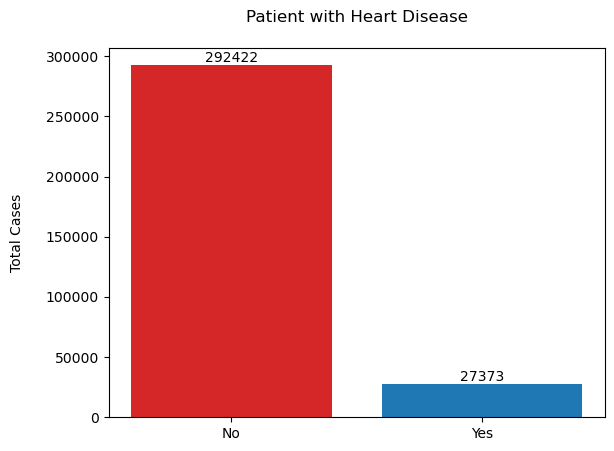

In [6]:
fig, ax = plt.subplots()

subtitle = ['No', 'Yes']
data_1 = base['HeartDisease'].value_counts()


bar_colors = ['tab:red', 'tab:blue']

ax.bar(subtitle, data_1, width = 0.1, color=bar_colors)

ax.set_ylabel('Total Cases\n')
ax.set_title('Patient with Heart Disease\n')
ax.bar_label(ax.bar(subtitle, data_1, color=bar_colors)) # Dados em cima da barra

plt.show()


## Creating a new dataframe only with data from patients who already have/had heart disease

In [7]:
HeartYes = base.loc[(base['HeartDisease']=='Yes')]

In [8]:
HeartYes = HeartYes.reset_index().rename(columns={'index': 'Count'})
HeartYes.index = HeartYes.index +1

In [9]:
HeartYes['Count'] = HeartYes.index

In [10]:
HeartYes

,Count,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,1,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
2,2,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
3,3,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
4,4,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
5,5,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27369,27369,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No
27370,27370,Yes,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8.0,No,No,No
27371,27371,Yes,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
27372,27372,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No


**Relationship between BMI and Heart disease.**

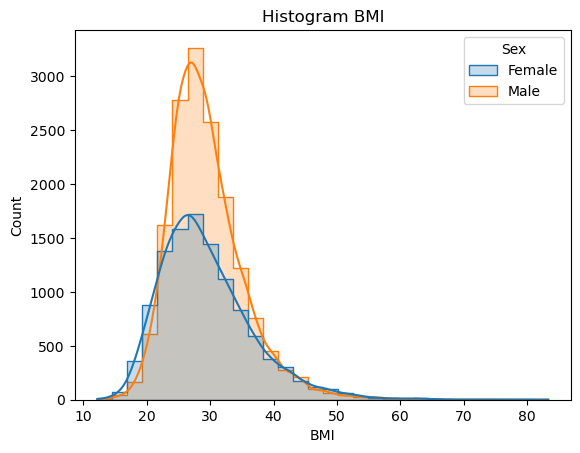

In [75]:
sns.histplot(data=HeartYes, x="BMI",bins=30, kde=True, hue="Sex", element="step")
plt.title("Histogram BMI")
plt.show()

<center>The median values of male and female BMI are above the standard values ​​of normality, which indicates an obese population.
<b>Males</b> have higher values in relation to obesit</center>

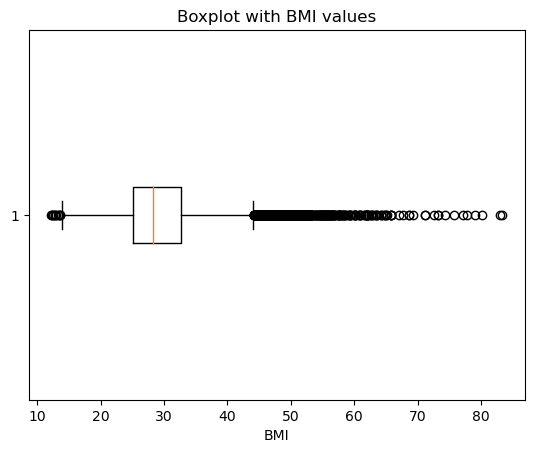

In [12]:
plt.boxplot(x= HeartYes['BMI'],vert=False)
plt.xlabel("BMI")
plt.title("Boxplot with BMI values")
plt.show()

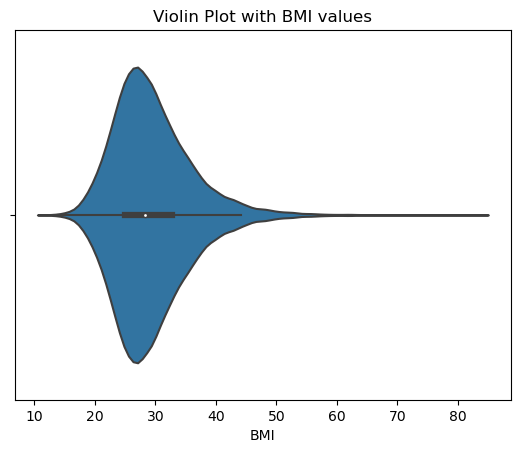

In [13]:
sns.violinplot(data=HeartYes, x="BMI")
plt.xlabel("BMI")
plt.title("Violin Plot with BMI values")
plt.show()

In [14]:
maxValues = HeartYes['BMI'].max()
print(maxValues)

83.33


The highest BMI value found was 83.33

In [15]:
minValues = HeartYes['BMI'].min()
print(minValues)

12.21


The lowest BMI found was 12.21

In [16]:
mean_df = base['BMI'].mean()
mean_df

28.325398520926328

The average of BMI values is 28.32, which demonstrates that our evaluated population is obese.

**Relationship between Physical Health and Heart disease.**

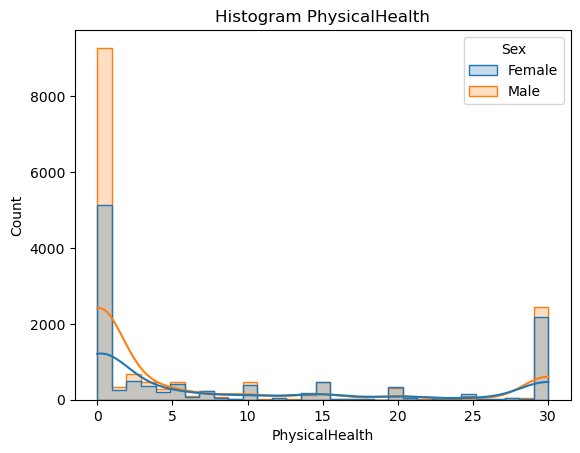

In [17]:
sns.histplot(data=HeartYes, x="PhysicalHealth",kde=True, hue="Sex", element="step")
plt.title("Histogram PhysicalHealth")
plt.show()

<center>The rate of heart disease in those who do not exercise is higher than those who exercise</center>

<div class= "alert alert-block alert-success">
  <b> The PhysicalHealth column refers to the number of days of exercises practiced, within a period of 30 days </b>
</div>

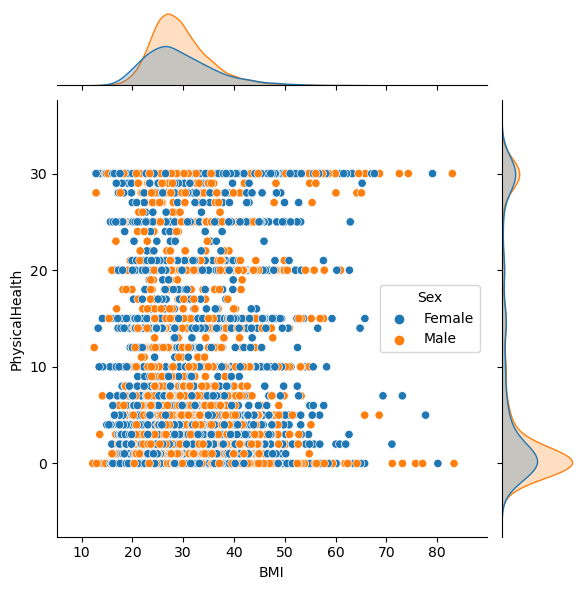

In [18]:
sns.jointplot(data=HeartYes, x="BMI", y="PhysicalHealth",hue="Sex")
plt.show()

The above jointplot demonstrates that the higher a patient's BMI, the less likely they are to be physically active, which can lead to heart disease and other complications.

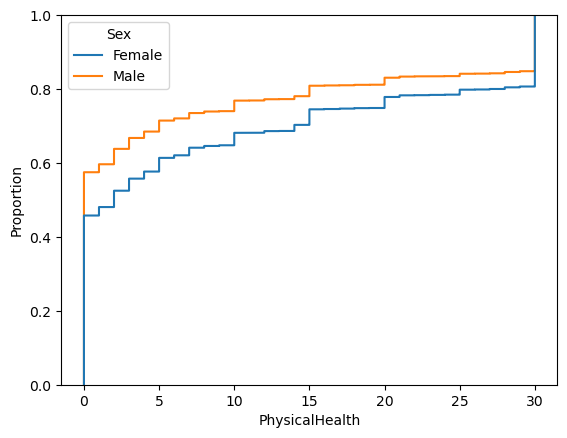

In [19]:
sns.ecdfplot(data=HeartYes, x="PhysicalHealth", hue="Sex")
plt.show()

In our empirical Cumulative Distribution Function (eCDF), we found that most of the values are concentrated mainly in the first 15 days of physical health records.

This corroborates the idea that most patients do not have the habit of exercising periodically

**Relationship between Mental Health and Heart disease.**

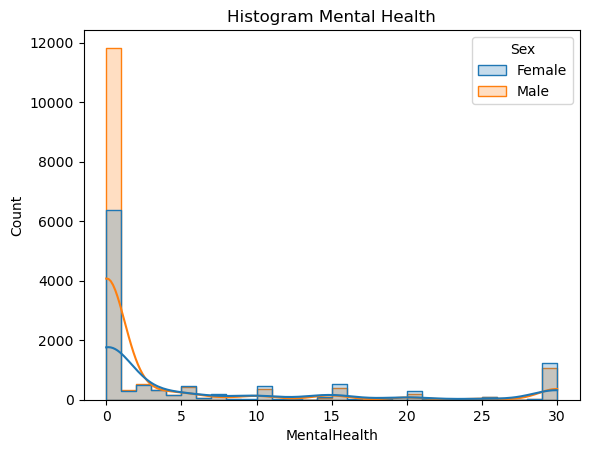

In [20]:
sns.histplot(data=HeartYes, x="MentalHealth",bins=30, kde=True, hue="Sex", element="step")
plt.title("Histogram Mental Health")
plt.show()

<div class= "alert alert-block alert-success">
  <b> The MentalHealth column refers to the patient's responses about their mental health in the last 30 days </b>
</div>

<center>According to what was reported by patients, the rate of those who reported having no type of mental health problems is higher than those who reported having some type of problem in the last 30 days.</center>

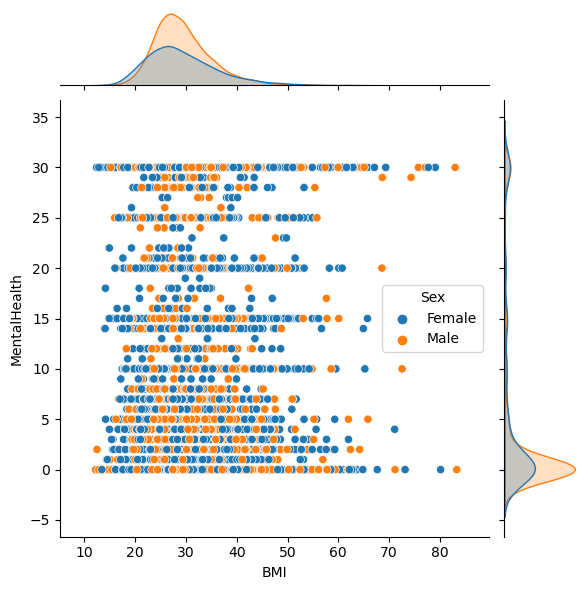

In [31]:
sns.jointplot(data=HeartYes, x="BMI", y="MentalHealth",hue="Sex")
plt.show()

The graph above, unlike what was expected, demonstrates that the largest number of patients report having very good mental health (their rate of days with mental problems on average was between 0 and 10 days in a month), thus not being correlated with a high BMI.

*The problem then may lie in the patient's adherence to physical exercise or in existing comorbidities.*

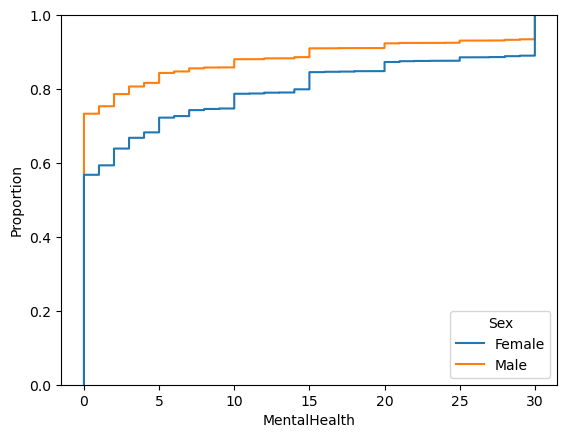

In [22]:
sns.ecdfplot(data=HeartYes, x="MentalHealth", hue="Sex")
plt.show()

In our empirical Cumulative Distribution Function (eCDF), we found that most of the values are concentrated mainly in the first 15 days of mental health records.

This corroborates the idea that most patients do not have relevant mental problems to change the sample.

**Multifactorial relationship between heart disease and other comorbidities**

In [23]:
HeartDisease = HeartYes['HeartDisease']=='Yes'
Stroke = HeartYes['Stroke']=='Yes'
Diabetic = HeartYes['Diabetic']=='Yes'
Asthma = HeartYes['Asthma']=='Yes'
KidneyDisease = HeartYes['KidneyDisease'] == 'Yes'
SkinCancer = HeartYes['SkinCancer'] == 'Yes'
DiffWalking = HeartYes['DiffWalking'] == 'Yes'

HD= HeartYes.loc[(HeartDisease),'HeartDisease'].count()
Heart_Stroke= HeartYes.loc[(Stroke), 'HeartDisease'].count()
Heart_Diabetic = HeartYes.loc[(Diabetic), 'HeartDisease'].count()
Heart_Asthma = HeartYes.loc[(Asthma), 'HeartDisease'].count()
Heart_KidneyDisease = HeartYes.loc[(KidneyDisease), 'HeartDisease'].count()
Heart_SkinCancer = HeartYes.loc[(SkinCancer), 'HeartDisease'].count()
Heart_DiffWalking = HeartYes.loc[(DiffWalking), 'HeartDisease'].count()

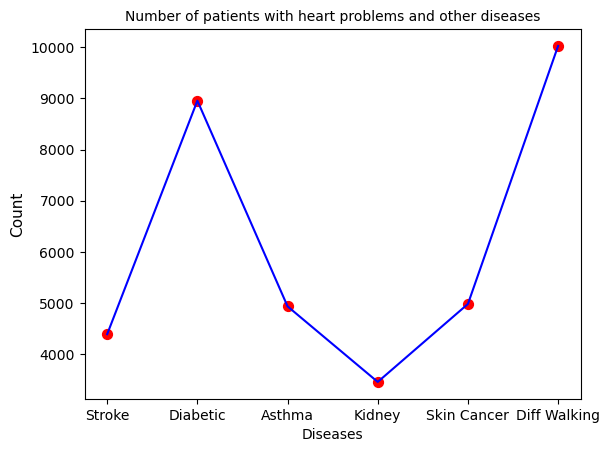

In [24]:
comorbidities = [Heart_Stroke,
                 Heart_Diabetic,
                 Heart_Asthma,
                 Heart_KidneyDisease,
                 Heart_SkinCancer,
                 Heart_DiffWalking]

subtitle = ['Stroke',
            'Diabetic',
            'Asthma',
            'Kidney',
            'Skin Cancer',
            'Diff Walking']

plt.title('Number of patients with heart problems and other diseases',fontsize = 10)
plt.xlabel('Diseases',fontsize = 10)
plt.ylabel('Count',fontsize = 11)
plt.plot(comorbidities, color = 'blue')
plt.scatter(subtitle,comorbidities, color = 'red', s= 50)


plt.show()

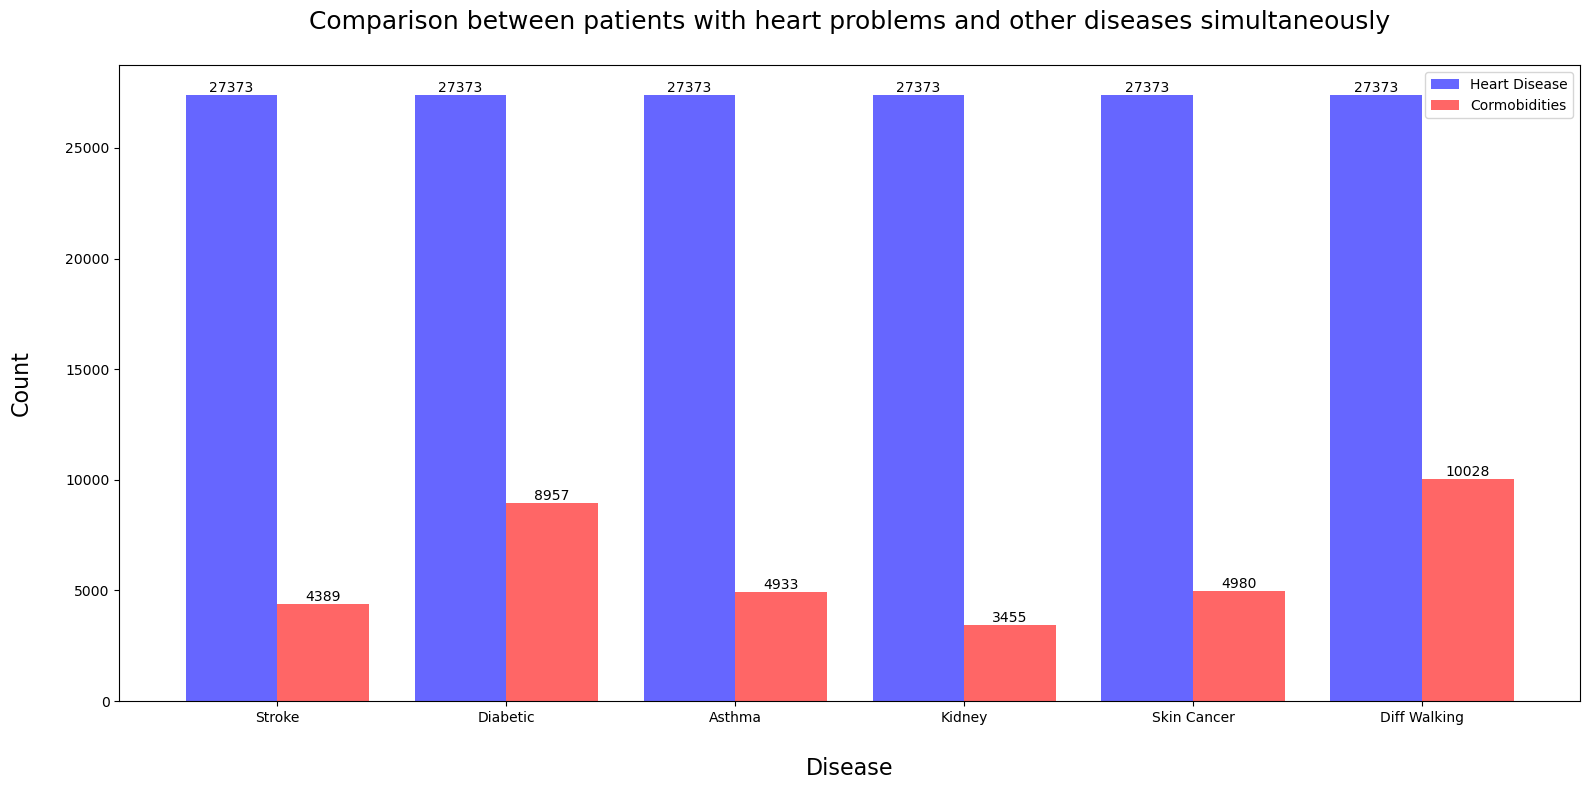

In [25]:
groups = 6
comparative = (HD)
comorbidities = [Heart_Stroke,
                 Heart_Diabetic,
                 Heart_Asthma,
                 Heart_KidneyDisease,
                 Heart_SkinCancer,
                 Heart_DiffWalking]

#Plot
plt.figure(figsize=(16,8)) 

index = np.arange(groups)
bar_width = 0.4
opacity = 0.6

rects1 = plt.bar(index - bar_width/2, comparative, bar_width,
                 alpha=opacity, color='b', label='Heart Disease')

rects2 = plt.bar(index + bar_width/2, comorbidities, bar_width,
                 alpha=opacity, color='r', label='Cormobidities')

plt.xlabel('\nDisease',fontsize = 16)
plt.ylabel('Count\n',fontsize = 16)

plt.title('Comparison between patients with heart problems and other diseases simultaneously\n',
         fontsize = 18)
plt.xticks(index, ('Stroke','Diabetic','Asthma',
                   'Kidney','Skin Cancer','Diff Walking'))

plt.legend()
plt.bar_label(rects1)
plt.bar_label(rects2)
plt.tight_layout()
plt.show()


The largest number found was of people with walking difficulties, which explains that there are a large number of people with sequelae that impede movement.
Soon after, we see that the number of diabetic people is also large, which can lead us to infer a correlation between heart problems, movement problems and metabolic diseases/syndromes.

**Relationship between addictions/bad habits and heart disease**

In [26]:
Smoke = HeartYes['Smoking']=='Yes'
Drink = HeartYes['AlcoholDrinking']=='Yes'


Smoker = HeartYes.loc[(Smoke), 'HeartDisease'].count()
Drinker = HeartYes.loc[(Drink), 'HeartDisease'].count()
Smoke_Drink = HeartYes.loc[(Smoke) & (Drink), 'HeartDisease'].count()

16037 1141 890


**Smoking and Heart Disease**

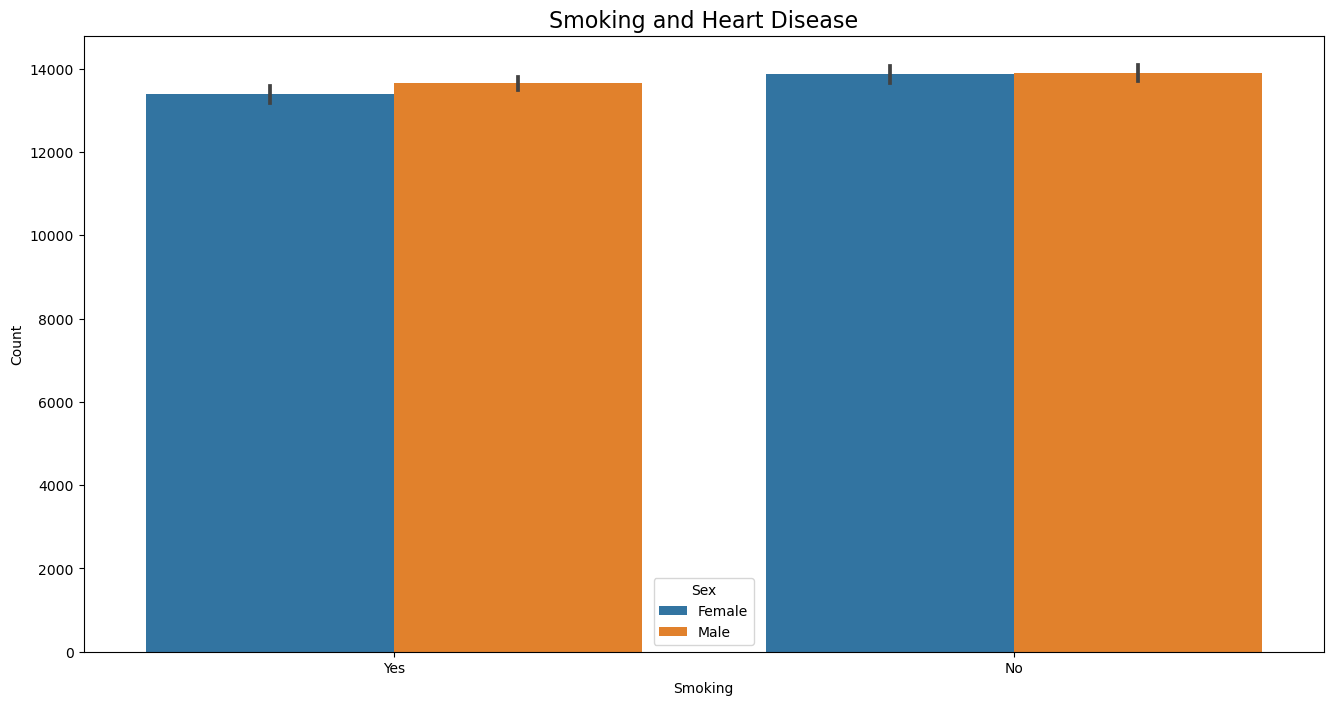

In [27]:
ax = plt.subplots(figsize=(16, 8))
smoke = sns.barplot(x='Smoking', y='Count', hue='Sex', data=HeartYes)
plt.title("Smoking and Heart Disease", fontsize=16)
plt.show()

Most patients with heart problems are non-smokers.
However, there is a slight difference between the sexes in terms of smokers, with males having the highest rate of smokers with heart problems.

**Drinking and Heart Disease**

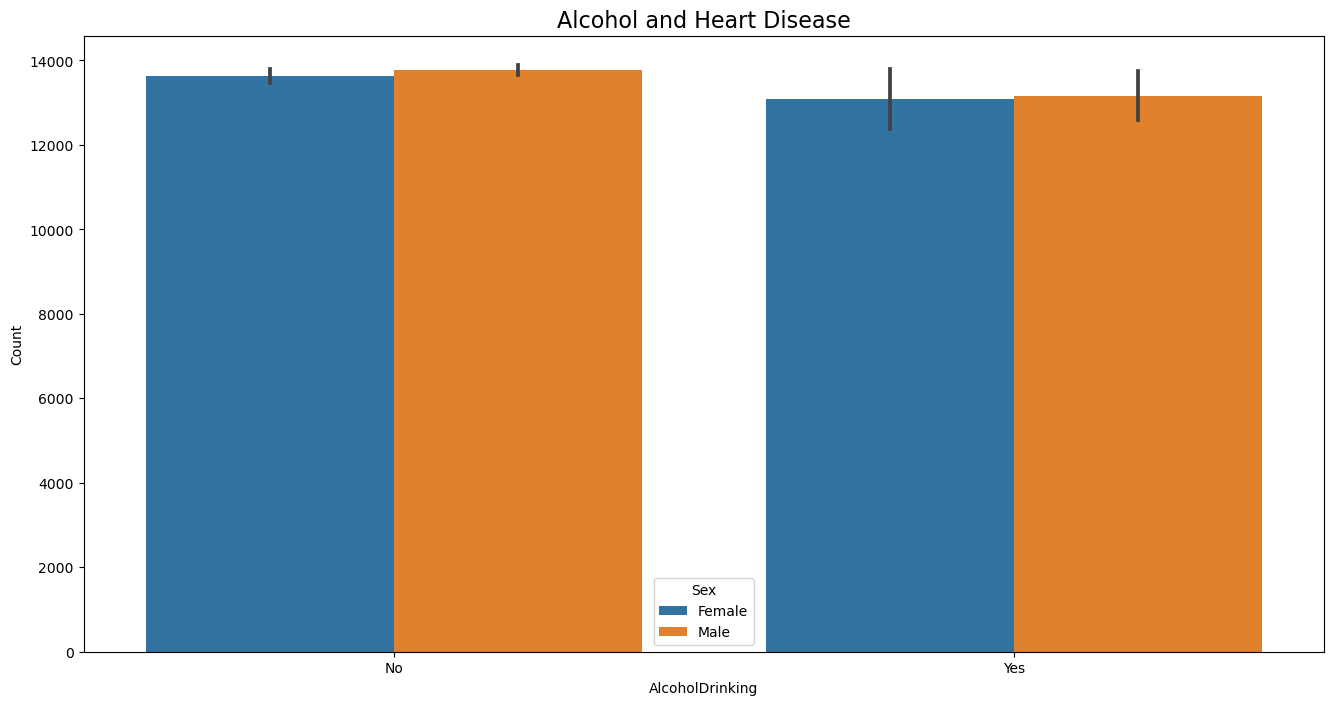

In [28]:
ax = plt.subplots(figsize=(16, 8))
alcohol = sns.barplot(x='AlcoholDrinking', y='Count', hue='Sex', data=HeartYes)
plt.title("Alcohol and Heart Disease", fontsize=16)
plt.show()

Most patients with heart problems do not have alcohol problems.
However, it can be seen that there is a slight difference between the sexes among the weekly users of alcoholic beverages, with males having the highest rate.

**Smoking and drinking in patients with heart disease**

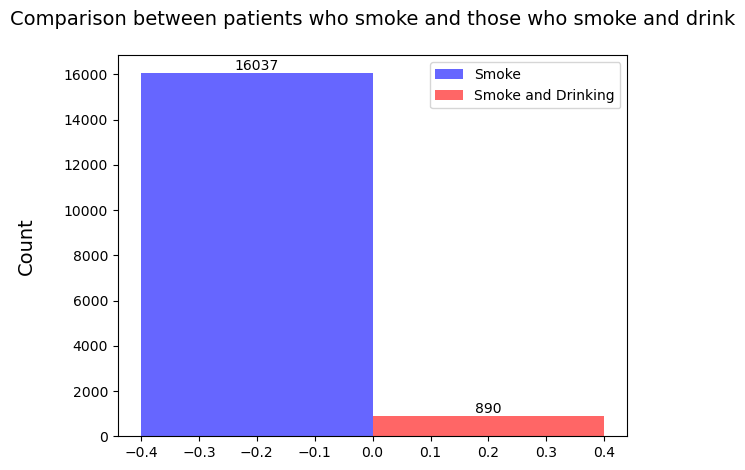

In [29]:
groups = 1
comparative = (Smoker)
habits = [Smoke_Drink]

#Plot
index = np.arange(groups)
bar_width = 0.4
opacity = 0.6

rects1 = plt.bar(index - bar_width/2, comparative, bar_width,
                 alpha=opacity, color='b', label='Smoke')

rects2 = plt.bar(index + bar_width/2, habits, bar_width,
                 alpha=opacity, color='r', label='Smoke and Drinking')

plt.ylabel('Count\n',fontsize = 14)

plt.title('Comparison between patients who smoke and those who smoke and drink\n',
         fontsize = 14)
plt.legend()
plt.bar_label(rects1)
plt.bar_label(rects2)
plt.tight_layout()
plt.show()

The population that uses alcohol and cigarettes is inexpressible. Therefore, we understand that those who drink and smoke, even though they are not part of the vast majority of the population that makes up the pattern of patients in the sample, are the population with the highest risk of worsening their health, since alcohol and cigarettes are responsible for the increase the risk of heart problems.

**Sleeping time in patients with heart disease**

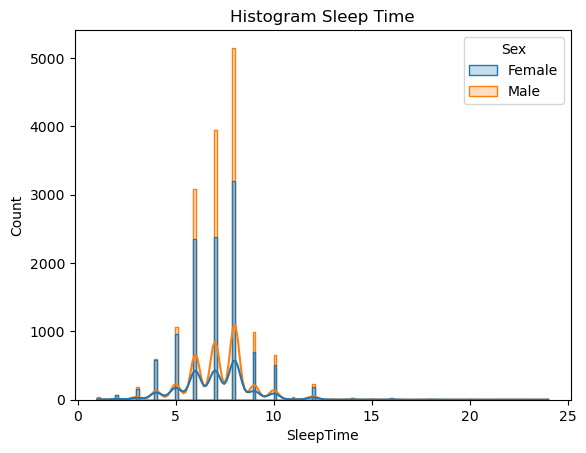

In [34]:
sns.histplot(data=HeartYes, x="SleepTime",kde=True, hue="Sex", element="step")
plt.title("Histogram Sleep Time")
plt.show()

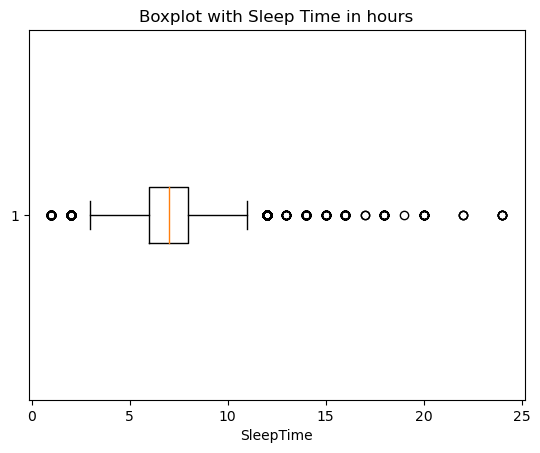

In [35]:
plt.boxplot(x= HeartYes['SleepTime'],vert=False)
plt.xlabel("SleepTime")
plt.title("Boxplot with Sleep Time in hours")
plt.show()

<center>The median values of male and female Sleep Time are within the standard normal values.</center>

In [39]:
minValues = HeartYes['SleepTime'].min()
print(minValues)

1.0


The lowest Sleep Time value found was 1.0 hour

In [40]:
maxValues = HeartYes['SleepTime'].max()
print(maxValues)

24.0


The highest Sleep Time value found was 24.0 hours

In [43]:
meanValues = HeartYes['SleepTime'].mean()
print(meanValues)

7.136156066196617


The mean value of sleep time found was 7.13 hours

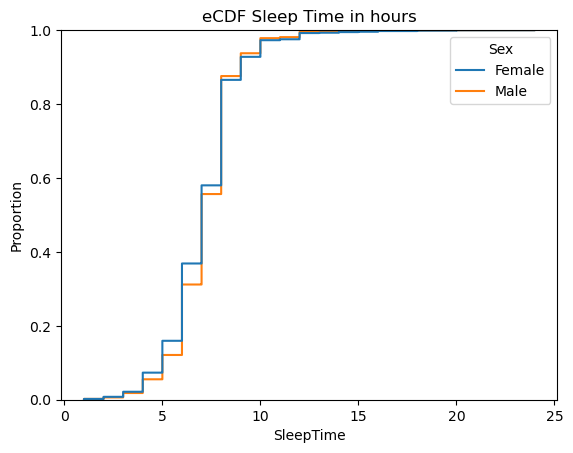

In [72]:
sns.ecdfplot(data=HeartYes, x="SleepTime", hue="Sex")
plt.title("eCDF Sleep Time in hours")
plt.show()

In our empirical cumulative distribution function (eCDF), we found that the majority of values are primarily concentrated in the first 10 hours of sleep time recording.

This corroborates the idea that most patients have good sleep hygiene.

**Age category of patients with heart disease**

In [64]:
def age_category(age):
    cs_age = HeartYes.loc[(HeartYes['AgeCategory']==age),'AgeCategory']
    percent =(cs_age.count()/len(HeartYes.index)) * 100
    return (percent)

print(f"Age Category (80 or older): {age_category('80 or older'):.2f}%\n")
print(f"Age Category (75-79): {age_category('75-79'):.2f}%\n")
print(f"Age Category (65-69): {age_category('65-69'):.2f}%\n")
print(f"Age Category (60-64): {age_category('60-64'):.2f}%\n")
print(f"Age Category (55-59): {age_category('55-59'):.2f}%\n")

Age Category (80 or older): 19.91%

Age Category (75-79): 14.79%

Age Category (65-69): 14.98%

Age Category (60-64): 12.15%

Age Category (55-59): 8.04%



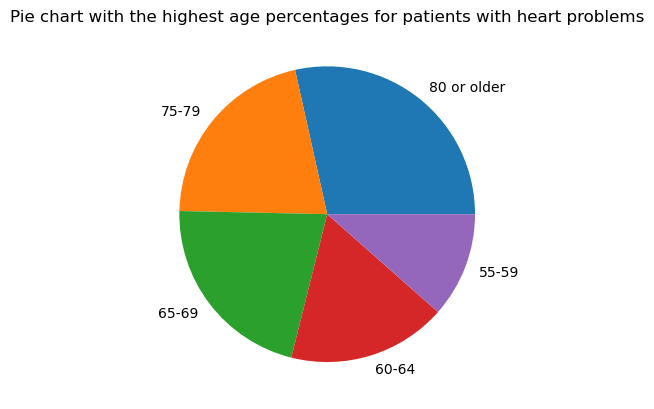

In [74]:
y = np.array([age_category('80 or older'), 
              age_category('75-79'),
              age_category('65-69'),
              age_category('60-64'),
              age_category('55-59')])

mylabels = ["80 or older", "75-79", "65-69", "60-64", '55-59']

plt.pie(y, labels = mylabels)
plt.title("Pie chart with the highest age percentages for patients with heart problems")
plt.show() 

About 69.86% of the patients are in the age group that corresponds to 55+.
Which indicates that most cases of people with heart problems are the elderly.

**Conclusions**


Of the 27,373 records evaluated of patients with heart problems, we can state that:

    1) There is a relationship between BMI and people with heart problems 
    - A large part of our sample has some degree of overweight, with an 
    average of 28.32 (Overweight, close to Obesity Grade I)

    2) Patients with heart problems are less likely to do physical 
    activities.

    3) In the sample, we found no relationship with mental health problems 
    and heart problems.

    4) Most of our sample patients have one or more comorbidities in 
    addition to heart problems.
    Walking problems and diabetes are the most reported.
    Which may actually serve to corroborate the lower demand for 
    physical activities in this population.

    5) Relationship between addictions and bad habits in patients with heart
    problems: No expressive values were found that the sample population has
    problems with addictions and bad health habits, on the contrary, the
    records showed excellent sleep hygiene and low adherence to the 
    cigarettes and alcoholic beverages.

    6) Most age records found were over 55 years old. 
    This demonstrates that the majority of the population with heart 
    problems is in the elderly age group.

With this, it is concluded that for a better health policy that will avoid the worsening of the health of people who already have or have had heart problems, it should be focused on the elderly population, with mobility problems and comorbidities/metabolic syndromes.

Feeding habits and ongoing care were not evaluated.

More data and studies are needed to visualize the impact of these unassessed factors.

Studies with Machine Learning and Artificial Intelligence can use the data collected to assess the risks of patients and define the probability of worsening the condition of this population, according to their health condition.

New studies are needed.

Moreover, this study fulfilled what was proposed, which was the visualization and manipulation of data on a specific population, demonstrating the author's ability to interpret data and generate knowledge in the face of a proposed dataframe.